In [32]:
import time
import random
from IPython.display import clear_output

#Default Values
player1Coins, player2Coins, boardCoins, turnCount  = 0, 0, 0, 0

turnCoinLimit = 3

#To see the efficiency of the bot we need to try out a large amount of coins to easily see the difference
#Player 1 will be using a random number of coins
#Player 2 will be our ruled based bot
startBoardCoins = 500

#We will use this to turn off most of the outputs in the game
simulation = True 

In [35]:
#Advanced & Random Player Choices 
#Randomisation can help throw off a real player's pattern recognition
#However this isn't enough as the choices still aren't smart enough to throw off a real strategy

def baselineThinking(boardCoins, turnCoinLimit):
    #Adding some rules so the bot can think based on the game's rules
    #if board(6) > maxlimit(3)
    #   board(3) = board(6) - maxlimit(3)
    if boardCoins > turnCoinLimit:
        playerChoice = random.randint(1, turnCoinLimit)
        #print("c1")
    
    #if board(2) < maxlimit(3)
    #   board(3) = board(2) - abs(board(2)-maxlimit(3))
    #if board(3) < maxlimitlimit(3)
    #   board(3) = board(2) - abs(minlimit(1)-board(3))
    if boardCoins <= turnCoinLimit and boardCoins != 1:
        playerChoice = abs(1-boardCoins)
        #print("c2")
    
    #No choices available since they lost
    if boardCoins == 1:
        playerChoice = 1
        #print("c3")
    

    return random.randint(1, 3)

def main(player1Coins, player2Coins, boardCoins, startBoardCoins, simulation):
    boardCoins = startBoardCoins
    playerWon = 0
    turnCount = 0

    if simulation == False:
        print("\n")
        print("Spoof Game Starting")
        print("Board Coins:", str(boardCoins))
        print("\n")
    
    while boardCoins > 1:
    #for i in range(5):
        #Increase turn counter
        turnCount = turnCount + 1
        #Announce Round Start
        if simulation == False:
            print("[Round", str(turnCount)+"] Started")
        
        
        player1Choice = random.randint(1, turnCoinLimit)
        if simulation == False:
            print("[Player 1] Chose:", player1Choice)
        if boardCoins-player1Choice <= 0:
            if simulation == False:
                print("[Player 1] LOST")
            playerWon = 2
            break
        else:
            boardCoins =boardCoins-player1Choice
            if simulation == False:
                print("Board Coins Remaining:", str(boardCoins)+"/"+str(startBoardCoins))
        
        #End game since there is no option left other than draw 1
        if boardCoins == 1:
            if simulation == False:
                print("[Player 2] LOST")
            playerWon = 1
            break
        
        
        player2Choice = baselineThinking(boardCoins, turnCoinLimit)
        if simulation == False:
            print("[Player 2] Chose:", player2Choice)
        if boardCoins-player2Choice <= 0:
            if simulation == False:
                print("[Player 2] LOST")
            playerWon = 1
            break
        else:
            boardCoins =boardCoins-player2Choice
            if simulation == False:
                print("Board Coins Remaining:", str(boardCoins)+"/"+str(startBoardCoins))
            
        #End game since there is no option left other than draw 1
        if boardCoins == 1:
            if simulation == False:
                print("[Player 1] LOST")
            playerWon = 2
            break
        #Announce Round End
        #print("[Round", str(turnCount)+"] Ended")
    
    if simulation == False:
        print("\n")
        print("\n")
        print("Rounds Taken:", str(turnCount))
        print("Board Coins:", str(boardCoins)+"/"+str(startBoardCoins))
    return playerWon, turnCount

In [39]:
playerWon, turnCount = main(player1Coins, player2Coins, boardCoins, startBoardCoins, simulation)
print("P"+str(playerWon))
print(turnCount)

P2
127


#### Next Steps:
- We want to be simulating games to see the effectiveness of the AI BOT (Player 2)

#### How do we store this data?
- We could store it in a list but we are not storing only the amount of rounds but also the player that has won the game as we want to measure the % of games won and the total number of rounds taken for each game. So we will be using pandas dataframes to store this 2d dataframe as it will allow us to more easily analyse the data.

In [52]:
# Importing Pandas to create DataFrame
import pandas as pd
import numpy as np

#Create a dataframe with the specified columns
df = pd.DataFrame(columns=['Game', 'Player', 'Rounds'])

#Lets run 100 games 
for i in range(5000):
    i = i + 1

    playerWon, turnCount = main(player1Coins, player2Coins, boardCoins, startBoardCoins, simulation)
    df = df.append({'Game': int(i),'Player': int(playerWon), 'Rounds': int(turnCount)}, ignore_index=True)

df['Game'] = df['Game'].astype(int)
df['Player'] = df['Player'].astype(int)
df['Rounds'] = df['Rounds'].astype(int)
#df.dtypes 

df


,Game,Player,Rounds
0,1,2,123
1,2,2,123
2,3,1,123
3,4,2,118
4,5,1,125
...,...,...,...
4995,4996,1,124
4996,4997,2,132
4997,4998,2,122
4998,4999,1,129


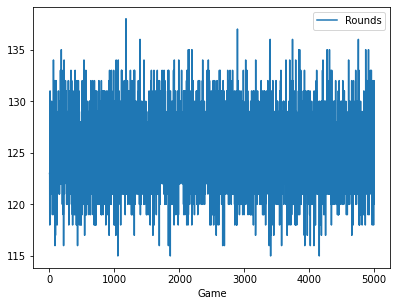

In [54]:
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (20,10)
#Reset custom plot size
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

df2 = df
df2.plot(x='Game', y='Rounds')
plt.show()

#The data is very hard to read and we could just make the graph output bigger on the X axis

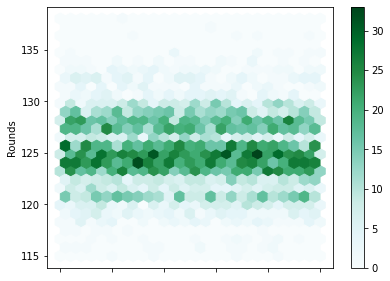

In [57]:
#Using hexbin it allows us to view the distribution of the amount of rounds played for each game
df.plot.hexbin(x="Game", y="Rounds", gridsize=25);

<AxesSubplot:>

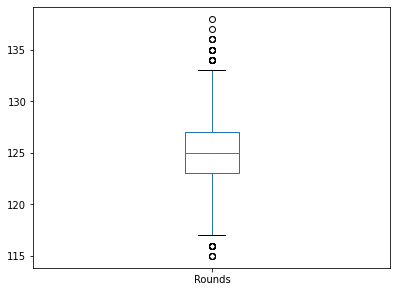

In [58]:
#We could also use box plots to view this data
dfRounds = df[["Rounds"]]
dfRounds.plot.box()